# SVM vs Perceptron Testing Accuracy

The objective of this notebook is to assess the relationship between the testing accuracy of an SVM with a linear kernel and a Perceptron both trained / fitted to the same training sets.

### Block used for importing local ml package

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

### Constraints of experiements

* Work on 2 dimensional space.
* Each test uses a large persistent testing set.
* Datasets are generated with uniform distribution.
* A small margin is kept constant.
* All datasets are labeled using y = x as the optimal separation line.

### Settings global state variables

In [5]:
test_size = 5000
x_start = -200
y_start = -200
x_end = 200
y_end = 200
margin = 4

### Generating testing set for y = x separation line

In [6]:
import numpy as np
from ml import datagen

test_set, test_labels = map(
    np.array, 
    datagen.make_uniform(test_size, x_start, x_end, y_start, y_end, margin)
)

## Experiment 1

Collect the average testing accuracies for an SVM and perceptron after being training on small training sets.
The perceptron is only trained on the data once, not until convegence.

Procedure:
1. Establish a range for n from 2 - 10.
2. Establish a repeat count for getting averages.
3. Enter a for loop for the range.
4. Enter a for loop for the repeat count.
5. Create a train set. Train / fit new perceptron and SVM.
6. Classify against test set, save the accuracies of each.

In [12]:
import statistics
from ml import datagen
from ml.perceptron import Perceptron
from sklearn import svm

dimensions = 2
learning_rate = 0.25
n_start = 2
n_end = 10
samples_per_n = 100

# data will contain n_end-n_start elements.
# Each element with consist of [N, average accuracy, standard deviation]
per_data = []
svm_data = []

for train_size in range(n_start, n_end+1):
    print('generating', train_size)
    
    # Contains accuracies
    per_samples = []
    svm_samples = []
    for __ in range(samples_per_n):
        
        # 1. Generate train set with at least 1 of each class
        train_set = []
        train_labels = []
        while list(train_labels).count(1) < 1 or list(train_labels).count(-1) < 1:
            train_set, train_labels = map(
                np.array,
                datagen.make_uniform(train_size, x_start, x_end, y_start, y_end, margin)
            )
        
        # 2. Train / fit perceptron and SVM.
        brain = Perceptron(dimensions, learning_rate)
        brain.train(train_set, train_labels)
        
        clf = svm.SVC(kernel='linear', C=1.0)
        clf.fit(train_set, train_labels)
        
        # 3. Gather classification accuracy data.
        svm_results = clf.predict(test_set)
        brain_results = [brain.classify(point) for point in test_set]
        
        brain_acc = sum(1 if x == y else 0 for x, y in zip(brain_results, test_labels))
        brain_acc /= len(test_set)
        svm_acc = sum(1 if x == y else 0 for x, y in zip(svm_results, test_labels))
        svm_acc /= len(test_set)
        
        per_samples.append(brain_acc)
        svm_samples.append(svm_acc)
    
    per_avg = statistics.mean(per_samples)
    svm_avg = statistics.mean(svm_samples)
    per_std = statistics.pstdev(per_samples)
    svm_std = statistics.pstdev(svm_samples)
    per_data.append([train_size, per_avg, per_std])
    svm_data.append([train_size, svm_avg, svm_std])

generating 2
generating 3
generating 4
generating 5
generating 6
generating 7
generating 8
generating 9
generating 10


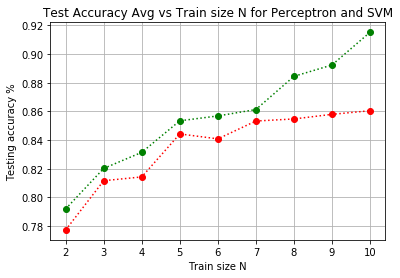

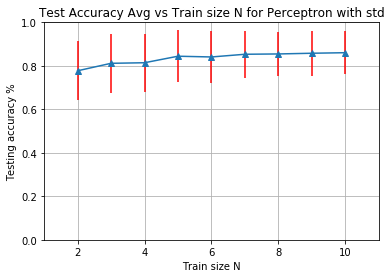

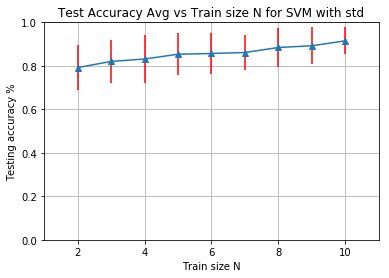

In [21]:
# Plot the per and svm data.

import matplotlib.pyplot as plt

plt.title('Test Accuracy Avg vs Train size N for Perceptron and SVM')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.grid(True)
# Perceptron data in red
plt.plot(
    [point[0] for point in per_data],
    [point[1] for point in per_data],
    'r:'
)
plt.plot(
    [point[0] for point in per_data],
    [point[1] for point in per_data],
    'ro'
)
# SVM data in green
plt.plot(
    [point[0] for point in svm_data],
    [point[1] for point in svm_data],
    'g:'
)
plt.plot(
    [point[0] for point in svm_data],
    [point[1] for point in svm_data],
    'go'
)

# Same as above but with standard deviation
plt.figure()
plt.title('Test Accuracy Avg vs Train size N for Perceptron with std')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.axis([1, 11, 0, 1])
plt.grid(True)
# Perceptron data in red
plt.errorbar(
    [point[0] for point in per_data],
    [point[1] for point in per_data],
    [point[2] for point in per_data],
    ecolor='r',
    marker='^'
)

# Same as above but with standard deviation
plt.figure()
plt.title('Test Accuracy Avg vs Train size N for SVM with std')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.axis([1, 11, 0, 1])
plt.grid(True)
# Perceptron data in red
plt.errorbar(
    [point[0] for point in svm_data],
    [point[1] for point in svm_data],
    [point[2] for point in svm_data],
    ecolor='r',
    marker='^'
)


plt.show()

## Experiment 2
Same as 1 but with larger N bounds

In [22]:
import statistics
from ml import datagen
from ml.perceptron import Perceptron
from sklearn import svm

dimensions = 2
learning_rate = 0.25
n_start = 10
n_end = 30
samples_per_n = 100

# data will contain n_end-n_start elements.
# Each element with consist of [N, average accuracy, standard deviation]
per_data_2 = []
svm_data_2 = []

for train_size in range(n_start, n_end+1):
    print('generating', train_size)
    
    # Contains accuracies
    per_samples = []
    svm_samples = []
    for __ in range(samples_per_n):
        
        # 1. Generate train set with at least 1 of each class
        train_set = []
        train_labels = []
        while list(train_labels).count(1) < 1 or list(train_labels).count(-1) < 1:
            train_set, train_labels = map(
                np.array,
                datagen.make_uniform(train_size, x_start, x_end, y_start, y_end, margin)
            )
        
        # 2. Train / fit perceptron and SVM.
        brain = Perceptron(dimensions, learning_rate)
        brain.train(train_set, train_labels)
        
        clf = svm.SVC(kernel='linear', C=1.0)
        clf.fit(train_set, train_labels)
        
        # 3. Gather classification accuracy data.
        svm_results = clf.predict(test_set)
        brain_results = [brain.classify(point) for point in test_set]
        
        brain_acc = sum(1 if x == y else 0 for x, y in zip(brain_results, test_labels))
        brain_acc /= len(test_set)
        svm_acc = sum(1 if x == y else 0 for x, y in zip(svm_results, test_labels))
        svm_acc /= len(test_set)
        
        per_samples.append(brain_acc)
        svm_samples.append(svm_acc)
    
    per_avg = statistics.mean(per_samples)
    svm_avg = statistics.mean(svm_samples)
    per_std = statistics.pstdev(per_samples)
    svm_std = statistics.pstdev(svm_samples)
    per_data_2.append([train_size, per_avg, per_std])
    svm_data_2.append([train_size, svm_avg, svm_std])

generating 10
generating 11
generating 12
generating 13
generating 14
generating 15
generating 16
generating 17
generating 18
generating 19
generating 20
generating 21
generating 22
generating 23
generating 24
generating 25
generating 26
generating 27
generating 28
generating 29
generating 30


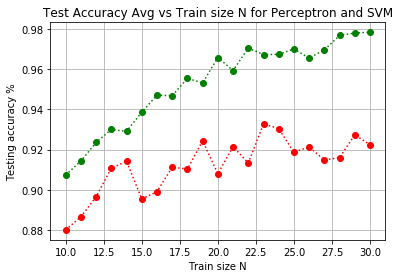

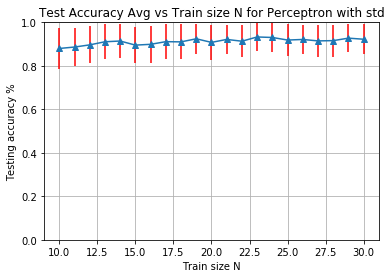

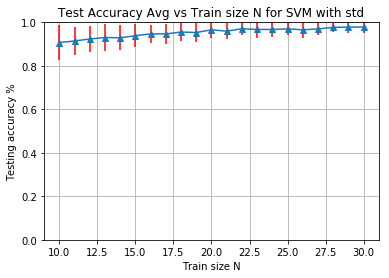

In [25]:
# Plot the per and svm data.

import matplotlib.pyplot as plt

plt.title('Test Accuracy Avg vs Train size N for Perceptron and SVM')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.grid(True)
# Perceptron data in red
plt.plot(
    [point[0] for point in per_data_2],
    [point[1] for point in per_data_2],
    'r:'
)
plt.plot(
    [point[0] for point in per_data_2],
    [point[1] for point in per_data_2],
    'ro'
)
# SVM data in green
plt.plot(
    [point[0] for point in svm_data_2],
    [point[1] for point in svm_data_2],
    'g:'
)
plt.plot(
    [point[0] for point in svm_data_2],
    [point[1] for point in svm_data_2],
    'go'
)

# Same as above but with standard deviation
plt.figure()
plt.title('Test Accuracy Avg vs Train size N for Perceptron with std')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.axis([9, 31, 0, 1])
plt.grid(True)
# Perceptron data in red
plt.errorbar(
    [point[0] for point in per_data_2],
    [point[1] for point in per_data_2],
    [point[2] for point in per_data_2],
    ecolor='r',
    marker='^'
)

# Same as above but with standard deviation
plt.figure()
plt.title('Test Accuracy Avg vs Train size N for SVM with std')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.axis([9, 31, 0, 1])
plt.grid(True)
# Perceptron data in red
plt.errorbar(
    [point[0] for point in svm_data_2],
    [point[1] for point in svm_data_2],
    [point[2] for point in svm_data_2],
    ecolor='r',
    marker='^'
)


plt.show()

### Experiment 3
Same as 1 but with convergence

In [34]:
import statistics
from ml import datagen
from ml.perceptron import Perceptron
from sklearn import svm

dimensions = 2
learning_rate = 0.25
n_start = 2
n_end = 10
samples_per_n = 100

# data will contain n_end-n_start elements.
# Each element with consist of [N, average accuracy, standard deviation]
per_data_3 = []
svm_data_3 = []

for train_size in range(n_start, n_end+1):
    print('generating', train_size)
    
    # Contains accuracies
    per_samples = []
    svm_samples = []
    for __ in range(samples_per_n):
        
        # 1. Generate train set with at least 1 of each class
        train_set = []
        train_labels = []
        while list(train_labels).count(1) < 1 or list(train_labels).count(-1) < 1:
            train_set, train_labels = map(
                np.array,
                datagen.make_uniform(train_size, x_start, x_end, y_start, y_end, margin)
            )
        
        # 2. Train / fit perceptron and SVM.
        brain = Perceptron(dimensions, learning_rate)
        brain.train(train_set, train_labels)
        brain.train(train_set, train_labels)
        brain.train(train_set, train_labels)

        
        clf = svm.SVC(kernel='linear', C=1.0)
        clf.fit(train_set, train_labels)
        
        # 3. Gather classification accuracy data.
        svm_results = clf.predict(test_set)
        brain_results = [brain.classify(point) for point in test_set]
        
        brain_acc = sum(1 if x == y else 0 for x, y in zip(brain_results, test_labels))
        brain_acc /= len(test_set)
        svm_acc = sum(1 if x == y else 0 for x, y in zip(svm_results, test_labels))
        svm_acc /= len(test_set)
        
        per_samples.append(brain_acc)
        svm_samples.append(svm_acc)
    
    per_avg = statistics.mean(per_samples)
    svm_avg = statistics.mean(svm_samples)
    per_std = statistics.pstdev(per_samples)
    svm_std = statistics.pstdev(svm_samples)
    per_data_3.append([train_size, per_avg, per_std])
    svm_data_3.append([train_size, svm_avg, svm_std])

generating 2
generating 3
generating 4
generating 5
generating 6
generating 7
generating 8
generating 9
generating 10


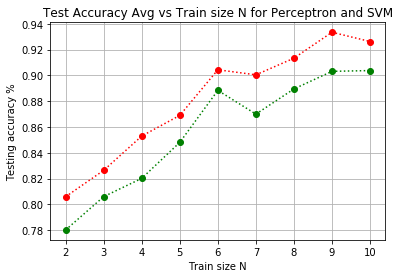

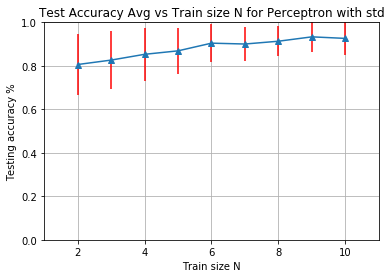

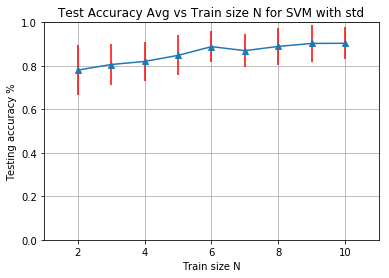

In [35]:
# Plot the per and svm data.

import matplotlib.pyplot as plt

plt.figure()
plt.title('Test Accuracy Avg vs Train size N for Perceptron and SVM')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.grid(True)
# Perceptron data in red
plt.plot(
    [point[0] for point in per_data_3],
    [point[1] for point in per_data_3],
    'r:'
)
plt.plot(
    [point[0] for point in per_data_3],
    [point[1] for point in per_data_3],
    'ro'
)
# SVM data in green
plt.plot(
    [point[0] for point in svm_data_3],
    [point[1] for point in svm_data_3],
    'g:'
)
plt.plot(
    [point[0] for point in svm_data_3],
    [point[1] for point in svm_data_3],
    'go'
)

# Same as above but with standard deviation
plt.figure()
plt.title('Test Accuracy Avg vs Train size N for Perceptron with std')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.axis([1, 11, 0, 1])
plt.grid(True)
# Perceptron data in red
plt.errorbar(
    [point[0] for point in per_data_3],
    [point[1] for point in per_data_3],
    [point[2] for point in per_data_3],
    ecolor='r',
    marker='^'
)

# Same as above but with standard deviation
plt.figure()
plt.title('Test Accuracy Avg vs Train size N for SVM with std')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.axis([1, 11, 0, 1])
plt.grid(True)
# Perceptron data in red
plt.errorbar(
    [point[0] for point in svm_data_3],
    [point[1] for point in svm_data_3],
    [point[2] for point in svm_data_3],
    ecolor='r',
    marker='^'
)


plt.show()

In [38]:
import statistics
from ml import datagen
from ml.perceptron import Perceptron
from sklearn import svm

dimensions = 2
learning_rate = 0.25
n_start = 20
n_end = 40
samples_per_n = 100

# data will contain n_end-n_start elements.
# Each element with consist of [N, average accuracy, standard deviation]
per_data_4 = []
svm_data_4 = []

for train_size in range(n_start, n_end+1):
    print('generating', train_size)
    
    # Contains accuracies
    per_samples = []
    svm_samples = []
    for __ in range(samples_per_n):
        
        # 1. Generate train set with at least 1 of each class
        train_set = []
        train_labels = []
        while list(train_labels).count(1) < 1 or list(train_labels).count(-1) < 1:
            train_set, train_labels = map(
                np.array,
                datagen.make_uniform(train_size, x_start, x_end, y_start, y_end, margin)
            )
        
        # 2. Train / fit perceptron and SVM.
        brain = Perceptron(dimensions, learning_rate)
        brain.train(train_set, train_labels)
        brain.train(train_set, train_labels)
        brain.train(train_set, train_labels)

        
        clf = svm.SVC(kernel='linear', C=1.0)
        clf.fit(train_set, train_labels)
        
        # 3. Gather classification accuracy data.
        svm_results = clf.predict(test_set)
        brain_results = [brain.classify(point) for point in test_set]
        
        brain_acc = sum(1 if x == y else 0 for x, y in zip(brain_results, test_labels))
        brain_acc /= len(test_set)
        svm_acc = sum(1 if x == y else 0 for x, y in zip(svm_results, test_labels))
        svm_acc /= len(test_set)
        
        per_samples.append(brain_acc)
        svm_samples.append(svm_acc)
    
    per_avg = statistics.mean(per_samples)
    svm_avg = statistics.mean(svm_samples)
    per_std = statistics.pstdev(per_samples)
    svm_std = statistics.pstdev(svm_samples)
    per_data_4.append([train_size, per_avg, per_std])
    svm_data_4.append([train_size, svm_avg, svm_std])

generating 20
generating 21
generating 22
generating 23
generating 24
generating 25
generating 26
generating 27
generating 28
generating 29
generating 30
generating 31
generating 32
generating 33
generating 34
generating 35
generating 36
generating 37
generating 38
generating 39
generating 40


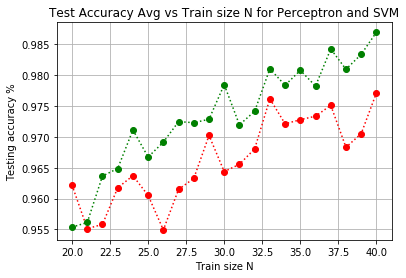

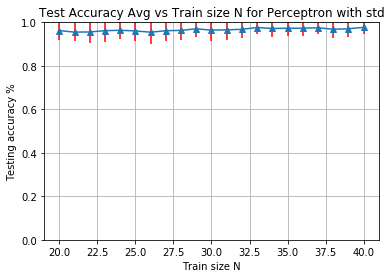

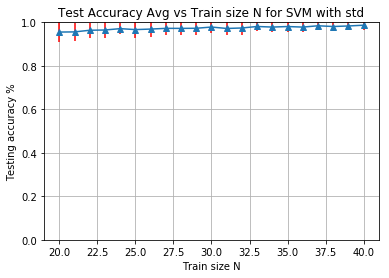

In [39]:
# Plot the per and svm data.

import matplotlib.pyplot as plt

plt.figure()
plt.title('Test Accuracy Avg vs Train size N for Perceptron and SVM')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.grid(True)
# Perceptron data in red
plt.plot(
    [point[0] for point in per_data_4],
    [point[1] for point in per_data_4],
    'r:'
)
plt.plot(
    [point[0] for point in per_data_4],
    [point[1] for point in per_data_4],
    'ro'
)
# SVM data in green
plt.plot(
    [point[0] for point in svm_data_4],
    [point[1] for point in svm_data_4],
    'g:'
)
plt.plot(
    [point[0] for point in svm_data_4],
    [point[1] for point in svm_data_4],
    'go'
)

# Same as above but with standard deviation
plt.figure()
plt.title('Test Accuracy Avg vs Train size N for Perceptron with std')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.axis([19, 41, 0, 1])
plt.grid(True)
# Perceptron data in red
plt.errorbar(
    [point[0] for point in per_data_4],
    [point[1] for point in per_data_4],
    [point[2] for point in per_data_4],
    ecolor='r',
    marker='^'
)

# Same as above but with standard deviation
plt.figure()
plt.title('Test Accuracy Avg vs Train size N for SVM with std')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.axis([19, 41, 0, 1])
plt.grid(True)
# Perceptron data in red
plt.errorbar(
    [point[0] for point in svm_data_4],
    [point[1] for point in svm_data_4],
    [point[2] for point in svm_data_4],
    ecolor='r',
    marker='^'
)


plt.show()